# Keras First Network
Source: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

## Step 1: Initialize, and load data

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

/anaconda3/envs/TDS/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/envs/TDS/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


### Load the dataset!

In [2]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

## Step 2: Define Model

In [3]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## Step 3: Compile Model

In [4]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Step 4: Fit Model

In [5]:
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
768/768 [==============================] - 1s 1ms/step - loss: 3.7106 - acc: 0.5977
Epoch 2/150
768/768 [==============================] - 0s 240us/step - loss: 0.9375 - acc: 0.5924
Epoch 3/150
768/768 [==============================] - 0s 233us/step - loss: 0.7478 - acc: 0.6445
Epoch 4/150
768/768 [==============================] - 0s 254us/step - loss: 0.7120 - acc: 0.6549
Epoch 5/150
768/768 [==============================] - 0s 264us/step - loss: 0.6839 - acc: 0.6667
Epoch 6/150
768/768 [==============================] - 0s 237us/step - loss: 0.6520 - acc: 0.6784
Epoch 7/150
768/768 [==============================] - 0s 231us/step - loss: 0.6503 - acc: 0.6810
Epoch 8/150
768/768 [==============================] - 0s 230us/step - loss: 0.6383 - acc: 0.6862
Epoch 9/150
768/768 [==============================] - 0s 253us/step - loss: 0.6248 - acc: 0.6953
Epoch 10/150
768/768 [==============================] - 0s 221us/step - loss: 0.6309 - acc: 0.6797
Epoch 11/150
768/768 

768/768 [==============================] - 0s 262us/step - loss: 0.5003 - acc: 0.7578
Epoch 84/150
768/768 [==============================] - 0s 229us/step - loss: 0.4980 - acc: 0.7578
Epoch 85/150
768/768 [==============================] - 0s 310us/step - loss: 0.5074 - acc: 0.7461
Epoch 86/150
768/768 [==============================] - 0s 247us/step - loss: 0.5074 - acc: 0.7461
Epoch 87/150
768/768 [==============================] - 0s 242us/step - loss: 0.5006 - acc: 0.7578
Epoch 88/150
768/768 [==============================] - 0s 255us/step - loss: 0.5029 - acc: 0.7669
Epoch 89/150
768/768 [==============================] - 0s 259us/step - loss: 0.5074 - acc: 0.7578
Epoch 90/150
768/768 [==============================] - 0s 323us/step - loss: 0.5101 - acc: 0.7500
Epoch 91/150
768/768 [==============================] - 0s 351us/step - loss: 0.5034 - acc: 0.7474
Epoch 92/150
768/768 [==============================] - 0s 301us/step - loss: 0.5115 - acc: 0.7409
Epoch 93/150
768/768 [=

## Step 5: Evaluate Model

In [6]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 89us/step

acc: 78.26%


# Display Deep Learning Model History

Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [7]:
import matplotlib.pyplot as plt

### Re-fit the model, this time: save the results!

In [8]:
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

### List all data in history

In [9]:
print(history.history.keys())

dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])


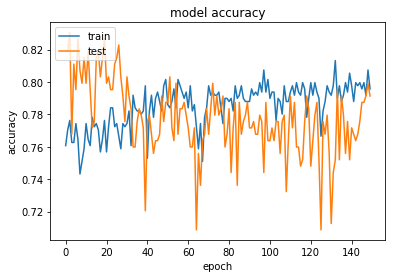

In [10]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

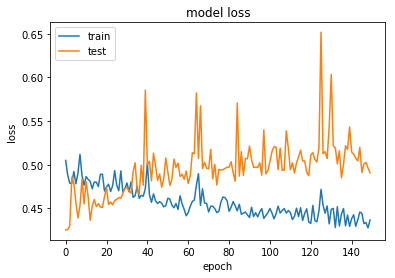

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Grid Search HyperParameters

Source: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

### Import SciKit Learn and KerasClassifier

In [12]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

### Define the function to create the Model

In [13]:
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

### Define the Model, using the create_model() function

In [14]:
model = KerasClassifier(build_fn=create_model, verbose=0)

### Define the grid search parameters

In [ ]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)

### Summarize Results

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))